Descargar datos y generar curva de plazos para cetes de la página del Banco de
México www.banxico.org.mx/SieInternet. Reproducir las figuras 1.2.2 y 1.2.3.

<Axes: xlabel='Fecha'>

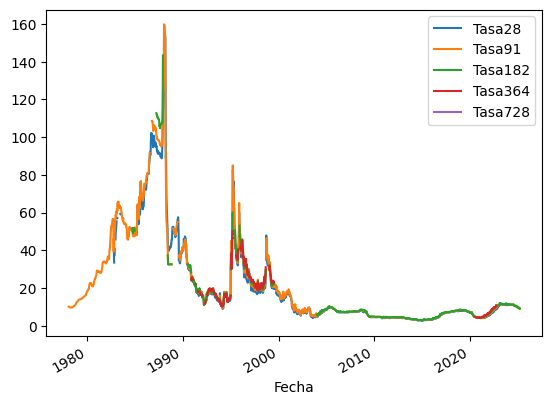

In [68]:
import pandas as pd
#Quitando las advertencias de sobreescritura
pd.options.mode.chained_assignment = None  # default='warn'
#Se lee el archivo
df = pd.read_csv('src/mexico/Consulta_20250322-131301409.csv',encoding ='latin1',skiprows=10)
#Se quitan las primeras filas que no contienen información útil
df = df.drop(index=range(0,8))
#Obteniendo solo las columnas de las tasasa de rendimiento
info_tasas_rend = df.iloc[:,[0,3,6,9,12,15]]
#Renombrando las columnas para un manejo más fácil
info_tasas_rend.columns = ['Fecha','Tasa28','Tasa91','Tasa182','Tasa364','Tasa728']
#Pone la primera columna como índice de la tabla
info_tasas_rend.set_index('Fecha')
#Convierte los registros de la primera columna a objetos de tipo fecha
info_tasas_rend['Fecha'] = pd.to_datetime(info_tasas_rend['Fecha'],dayfirst=True)
#Convierte los registros de las otras columnas a numérico
info_tasas_rend['Tasa28'] = pd.to_numeric(info_tasas_rend['Tasa28'],'coerce')
info_tasas_rend['Tasa91'] = pd.to_numeric(info_tasas_rend['Tasa91'],'coerce')
info_tasas_rend['Tasa182'] = pd.to_numeric(info_tasas_rend['Tasa182'],'coerce')
info_tasas_rend['Tasa364'] = pd.to_numeric(info_tasas_rend['Tasa364'],'coerce')
info_tasas_rend['Tasa728'] = pd.to_numeric(info_tasas_rend['Tasa728'],'coerce')
#Grafica la información
info_tasas_rend.plot(x='Fecha')

<Axes: xlabel='Fecha'>

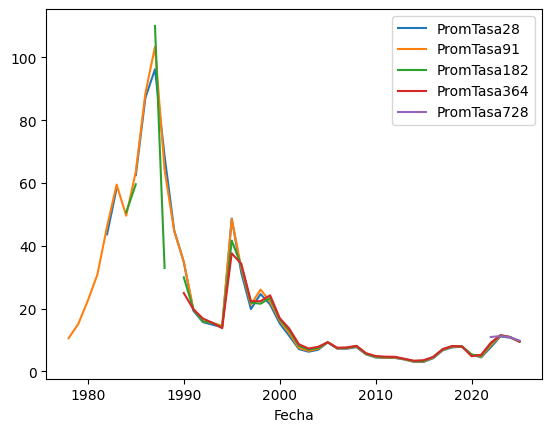

In [81]:
#Declarlando las nuevas etiquetas para las columnas del promedio
etiquetas_proms = {'Tasa28':'PromTasa28','Tasa91':'PromTasa91','Tasa182':'PromTasa182','Tasa364':'PromTasa364','Tasa728':'PromTasa728'}
#Calculando los promedios por año
prom_tasas_anual = info_tasas_rend.groupby(info_tasas_rend.Fecha.dt.year).agg({'Tasa28':'mean','Tasa91':'mean','Tasa182':'mean','Tasa364':'mean','Tasa728':'mean'}).reset_index().rename(columns=etiquetas_proms)
#Graficando los promedios
prom_tasas_anual.plot(x='Fecha')

None


<Axes: >

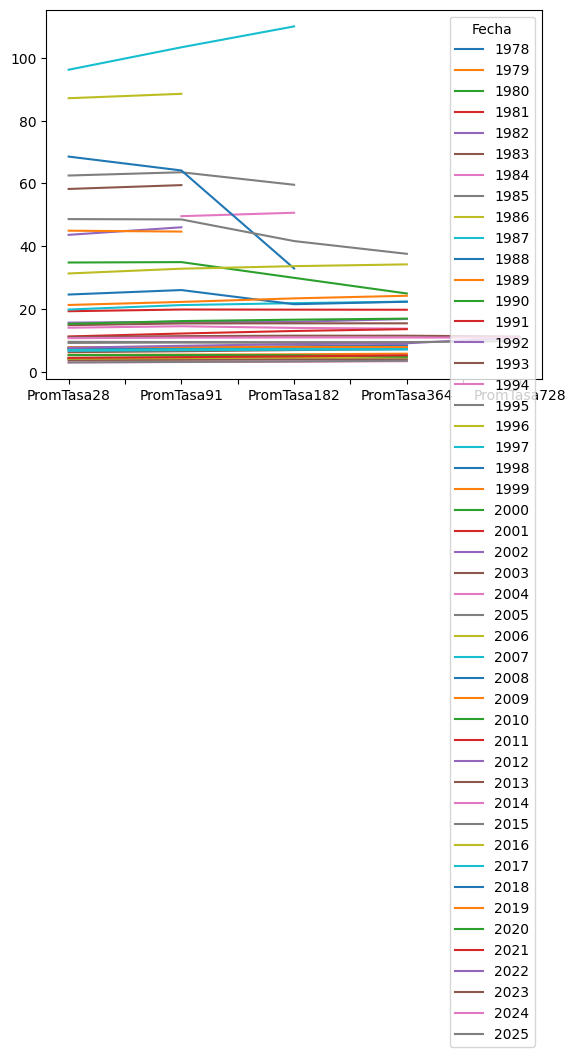

In [ ]:
#Calcular las curvas de rendimiento por madurez
prom_tasas_anual.set_index('Fecha',inplace=True)
prom_tasas_anual.transpose().plot()

Descargar datos y generar curva de plazos para notas de la tesorería de EU de la
pagina //home.treasury.gov. Reproducir las figuras 1.2.4 y 1.2.5.

C:\Users\em161\AppData\Local\Temp\ipykernel_17840\3827759438.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  info_tasas_rend_us['Date'] = pd.to_datetime(info_tasas_rend_us['Date'])


<Axes: xlabel='Date'>

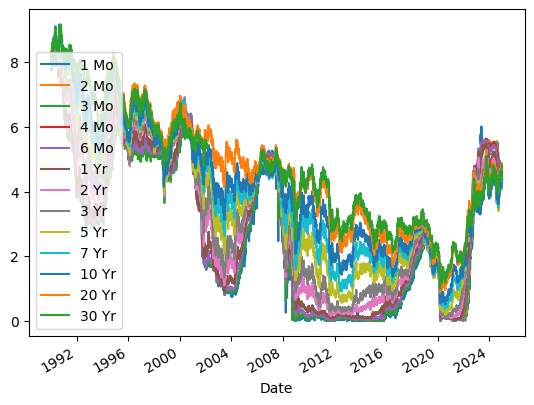

In [71]:
#Se lee el archivo
df_us = pd.read_csv('src/us/yield-curve-rates-1990-2024.csv')
#Obteniendo solo las columnas de las tasasa de rendimiento
info_tasas_rend_us = df_us.sort_index()
#Pone la primera columna como índice de la tabla
info_tasas_rend_us.set_index('Date')
#Convierte los registros de la primera columna a objetos de tipo fecha
info_tasas_rend_us['Date'] = pd.to_datetime(info_tasas_rend_us['Date'])
#Convierte los registros de las otras columnas a numérico
info_tasas_rend_us['1 Mo'] = pd.to_numeric(info_tasas_rend_us['1 Mo'],'coerce')
info_tasas_rend_us['2 Mo'] = pd.to_numeric(info_tasas_rend_us['2 Mo'],'coerce')
info_tasas_rend_us['3 Mo'] = pd.to_numeric(info_tasas_rend_us['3 Mo'],'coerce')
info_tasas_rend_us['4 Mo'] = pd.to_numeric(info_tasas_rend_us['4 Mo'],'coerce')
info_tasas_rend_us['6 Mo'] = pd.to_numeric(info_tasas_rend_us['6 Mo'],'coerce')
info_tasas_rend_us['1 Yr'] = pd.to_numeric(info_tasas_rend_us['1 Yr'],'coerce')
info_tasas_rend_us['2 Yr'] = pd.to_numeric(info_tasas_rend_us['2 Yr'],'coerce')
info_tasas_rend_us['3 Yr'] = pd.to_numeric(info_tasas_rend_us['3 Yr'],'coerce')
info_tasas_rend_us['5 Yr'] = pd.to_numeric(info_tasas_rend_us['5 Yr'],'coerce')
info_tasas_rend_us['7 Yr'] = pd.to_numeric(info_tasas_rend_us['7 Yr'],'coerce')
info_tasas_rend_us['10 Yr'] = pd.to_numeric(info_tasas_rend_us['10 Yr'],'coerce')
info_tasas_rend_us['20 Yr'] = pd.to_numeric(info_tasas_rend_us['20 Yr'],'coerce')
info_tasas_rend_us['30 Yr'] = pd.to_numeric(info_tasas_rend_us['30 Yr'],'coerce')
#Grafica la información
info_tasas_rend_us.plot(x='Date')

<Axes: xlabel='Date'>

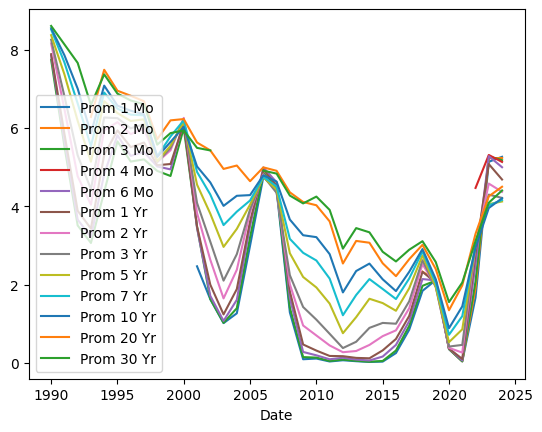

In [72]:
#Declarlando las nuevas etiquetas para las columnas del promedio
etiquetas_proms_us = {'1 Mo':'Prom 1 Mo','2 Mo':'Prom 2 Mo','3 Mo':'Prom 3 Mo','4 Mo':'Prom 4 Mo','6 Mo':'Prom 6 Mo','1 Yr':'Prom 1 Yr','2 Yr':'Prom 2 Yr','3 Yr':'Prom 3 Yr','5 Yr':'Prom 5 Yr','7 Yr':'Prom 7 Yr','10 Yr':'Prom 10 Yr','20 Yr':'Prom 20 Yr','30 Yr':'Prom 30 Yr'}
#Calculando los promedios por año
prom_tasas_anual_us = info_tasas_rend_us.groupby(info_tasas_rend_us.Date.dt.year).agg({'1 Mo':'mean','2 Mo':'mean','3 Mo':'mean','4 Mo':'mean','6 Mo':'mean','1 Yr':'mean','2 Yr':'mean','3 Yr':'mean','5 Yr':'mean','7 Yr':'mean','10 Yr':'mean','20 Yr':'mean','30 Yr':'mean'}).reset_index().rename(columns=etiquetas_proms_us)
#Graficando los promedios
prom_tasas_anual_us.plot(x='Date')

<Axes: >

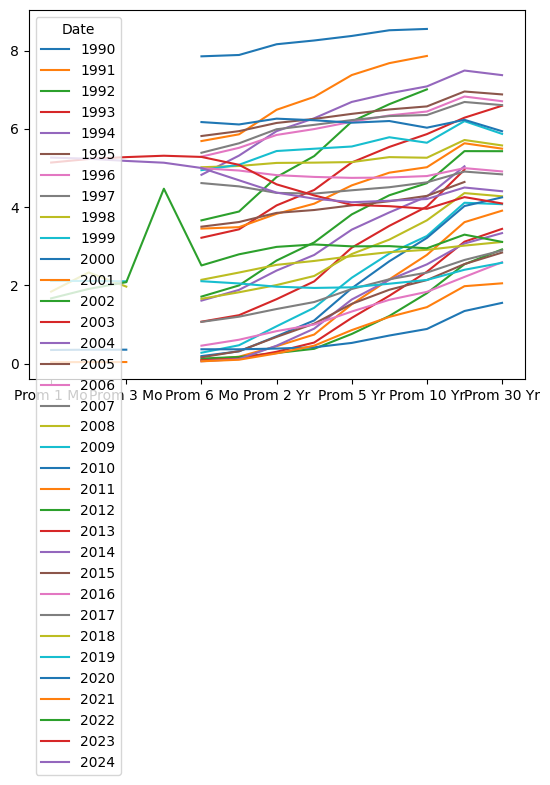

In [82]:
#Calcular las curvas de rendimiento por madurez
prom_tasas_anual_us.set_index('Date',inplace=True)
prom_tasas_anual_us.transpose().plot()

Descargar datos y generar curva de plazos para bnos japoneses de la pagina web
https://www.mof.go.jp. Reproducir las figuras 1.2.6 y 1.2.7.

<Axes: xlabel='Date'>

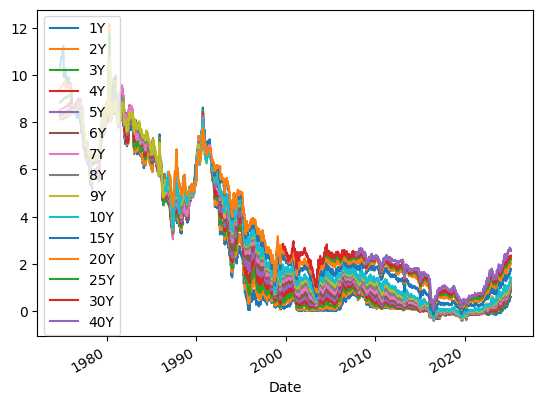

In [74]:
df_jp = pd.read_csv('src/jp/jgbcme_all.csv',skiprows=1)
#Se quitan las primeras filas que no contienen información útil
#Pone la primera columna como índice de la tabla
info_tasas_rend_jp = df_jp.sort_index()
info_tasas_rend_jp.set_index('Date')
#Convierte los registros de la primera columna a objetos de tipo fecha
info_tasas_rend_jp['Date'] = pd.to_datetime(info_tasas_rend_jp['Date'])
#Convierte los registros de las otras columnas a numérico
info_tasas_rend_jp['1Y'] = pd.to_numeric(info_tasas_rend_jp['1Y'],'coerce')
info_tasas_rend_jp['2Y'] = pd.to_numeric(info_tasas_rend_jp['2Y'],'coerce')
info_tasas_rend_jp['3Y'] = pd.to_numeric(info_tasas_rend_jp['3Y'],'coerce')
info_tasas_rend_jp['4Y'] = pd.to_numeric(info_tasas_rend_jp['4Y'],'coerce')
info_tasas_rend_jp['5Y'] = pd.to_numeric(info_tasas_rend_jp['5Y'],'coerce')
info_tasas_rend_jp['6Y'] = pd.to_numeric(info_tasas_rend_jp['6Y'],'coerce')
info_tasas_rend_jp['7Y'] = pd.to_numeric(info_tasas_rend_jp['7Y'],'coerce')
info_tasas_rend_jp['8Y'] = pd.to_numeric(info_tasas_rend_jp['8Y'],'coerce')
info_tasas_rend_jp['9Y'] = pd.to_numeric(info_tasas_rend_jp['9Y'],'coerce')
info_tasas_rend_jp['10Y'] = pd.to_numeric(info_tasas_rend_jp['10Y'],'coerce')
info_tasas_rend_jp['15Y'] = pd.to_numeric(info_tasas_rend_jp['15Y'],'coerce')
info_tasas_rend_jp['20Y'] = pd.to_numeric(info_tasas_rend_jp['20Y'],'coerce')
info_tasas_rend_jp['25Y'] = pd.to_numeric(info_tasas_rend_jp['25Y'],'coerce')
info_tasas_rend_jp['30Y'] = pd.to_numeric(info_tasas_rend_jp['30Y'],'coerce')
info_tasas_rend_jp['40Y'] = pd.to_numeric(info_tasas_rend_jp['40Y'],'coerce')
#Grafica la información
info_tasas_rend_jp.plot(x='Date')

<Axes: xlabel='Date'>

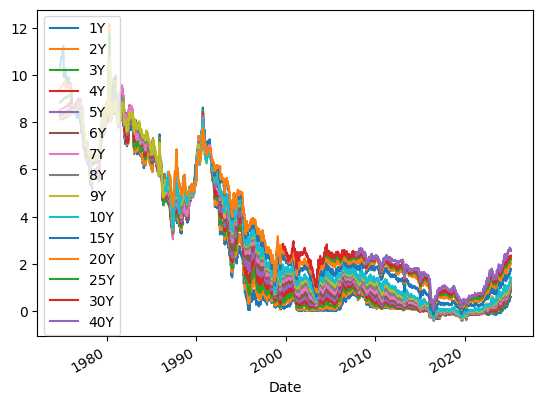

In [75]:
#Declarlando las nuevas etiquetas para las columnas del promedio
etiquetas_proms_jp = {'1Y':'Prom 1Y','2Y':'Prom 2Y','3Y':'Prom 3Y','4Y':'Prom 4Y','5Y':'Prom 5Y','6Y':'Prom 6Y','7Y':'Prom 7Y','8Y':'Prom 8Y','9Y':'Prom 9Y','10Y':'Prom 10Y','15Y':'Prom 15Y','20Y':'Prom 20Y','25Y':'Prom 25Y','30Y':'Prom 30Y','40Y':'Prom 40Y','Date':'Date'}
#Calculando los promedios por año
prom_tasas_anual_jp = info_tasas_rend_jp.groupby(info_tasas_rend_jp.Date.dt.year).agg({'1Y':'mean','2Y':'mean','3Y':'mean','4Y':'mean','5Y':'mean','6Y':'mean','7Y':'mean','8Y':'mean','9Y':'mean','10Y':'mean','15Y':'mean','20Y':'mean','25Y':'mean','30Y':'mean','40Y':'mean'}).reset_index().rename(columns=etiquetas_proms_jp)
#Graficando los promedios
info_tasas_rend_jp.plot(x='Date')

<Axes: >

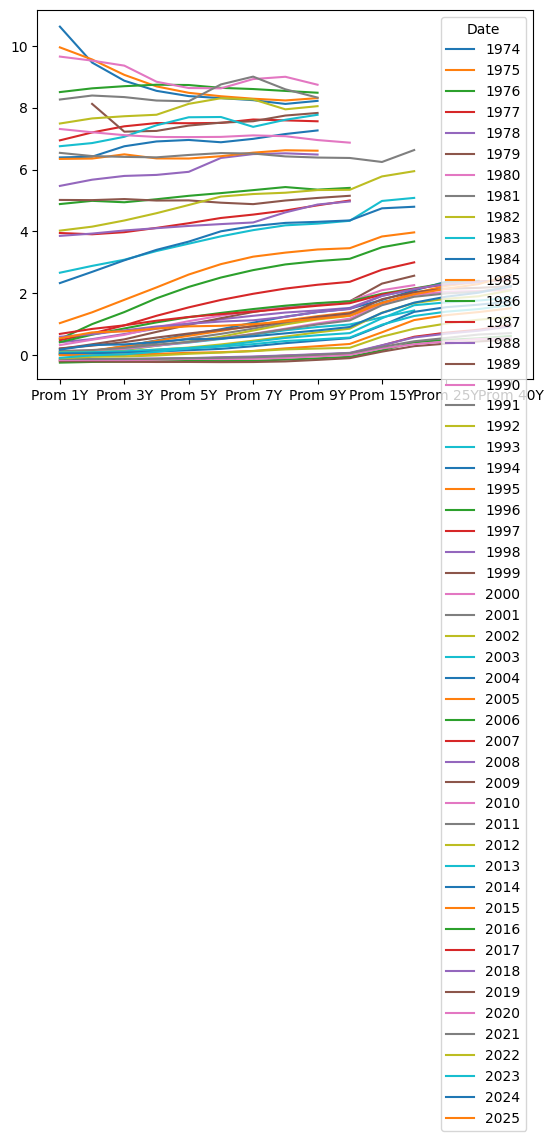

In [83]:
#Calcular las curvas de rendimiento por madurez
prom_tasas_anual_jp.set_index('Date',inplace=True)
prom_tasas_anual_jp.transpose().plot()
